# Average temperature dataset
Get the average temperature data for St. Louis, Missouri from NOOA website. Please note that the missing values
are coded with -99. Perform the following tasks:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* Import dataset.

In [2]:
data_folder = 'AverageTemperatureData/'
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
month_from = 0
month_to = 7

In [3]:
avg_temp_df = pd.DataFrame()
for month in months[month_from:month_to]:
    new_dataframe = pd.read_csv(f'{data_folder}data{month}.csv', header=4, usecols=['Date', 'Value'])
    new_dataframe.rename(columns={'Value': month}, inplace=True)
    new_dataframe.Date = new_dataframe.Date.apply(lambda x: int(str(x)[:-2]))
    new_dataframe.set_index('Date', inplace=True)
    avg_temp_df = pd.concat([avg_temp_df, new_dataframe], axis=1)
avg_temp_df.sort_values('Date', inplace=True)

In [4]:
avg_temp_df.head(10)

,JAN,FEB,MAR,APR,MAY,JUN,JUL
Date,,,,,,,
1938,NaN,NaN,NaN,57.3,65.6,74.3,81.3
1939,38.7,33.9,47.6,53.0,68.9,76.3,80.5
1940,14.9,33.1,43.0,54.1,63.6,76.5,79.5
1941,34.2,32.0,39.9,59.6,70.1,76.9,81.0
1942,31.6,33.4,46.3,60.1,65.7,75.1,80.6
1943,30.8,39.1,40.0,55.0,65.2,77.9,81.9
1944,36.2,37.4,41.0,53.4,71.2,79.5,79.6
1945,27.9,35.4,54.0,56.9,61.3,71.0,77.5
1946,33.6,40.1,56.5,60.5,62.8,76.6,80.1


In [5]:
avg_temp_df.tail(10)

,JAN,FEB,MAR,APR,MAY,JUN,JUL
Date,,,,,,,
2015,32.8,26.4,46.0,59.8,69.1,77.2,80.1
2016,33.5,39.8,52.6,59.4,66.0,80.8,81.1
2017,37.5,47.2,49.5,61.8,68.2,77.9,83.8
2018,30.1,38.4,43.5,50.2,75.8,80.7,80.6
2019,31.2,35.2,43.0,58.8,68.2,75.6,81.7
2020,36.1,37.6,51.0,55.1,65.1,79.0,82.5
2021,35.0,26.5,52.1,57.1,65.3,78.9,79.6
2022,29.5,34.6,49.2,56.5,69.2,79.3,82.9
2023,39.5,43.2,45.9,58.5,69.8,77.2,81.5


* Locate missing values and change them to nan.

In [6]:
avg_temp_df.iloc[-12]

JAN    35.7
FEB    35.7
MAR   -99.0
APR    55.5
MAY    67.2
JUN    76.0
JUL    77.9
Name: 2013, dtype: float64

In [7]:
avg_temp_df.replace(to_replace=-99., value=float('nan'), inplace=True)
avg_temp_df.iloc[-12]

JAN    35.7
FEB    35.7
MAR     NaN
APR    55.5
MAY    67.2
JUN    76.0
JUL    77.9
Name: 2013, dtype: float64

* Use the interpolate function to put a value in the Nan’s place

In [8]:
avg_temp_df.interpolate(method='linear', axis=0, inplace=True)
avg_temp_df.iloc[-12]

JAN    35.70
FEB    35.70
MAR    51.55
APR    55.50
MAY    67.20
JUN    76.00
JUL    77.90
Name: 2013, dtype: float64

In [9]:
avg_temp_df.tail(2)

,JAN,FEB,MAR,APR,MAY,JUN,JUL
Date,,,,,,,
2023,39.5,43.2,45.9,58.5,69.8,77.2,81.5
2024,32.0,43.2,45.9,58.5,69.8,77.2,81.5


* Convert the index to datetime format.

In [10]:
avg_temp_df.index

Index([1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2024],
      dtype='int64', name='Date')

In [11]:
pd.to_datetime(avg_temp_df.index, format='%Y')

DatetimeIndex(['1938-01-01', '1939-01-01', '1940-01-01', '1941-01-01',
               '1942-01-01', '1943-01-01', '1944-01-01', '1945-01-01',
               '1946-01-01', '1947-01-01', '1948-01-01', '1949-01-01',
               '1950-01-01', '1951-01-01', '1952-01-01', '1953-01-01',
               '1954-01-01', '1955-01-01', '1956-01-01', '1957-01-01',
               '1958-01-01', '1959-01-01', '1960-01-01', '1961-01-01',
               '1962-01-01', '1963-01-01', '1964-01-01', '1965-01-01',
               '1966-01-01', '1967-01-01', '1968-01-01', '1969-01-01',
               '1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
      

* Plot the average temperature time series, the corresponding histogram, and kernel density plot.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.5, 1.0, 'Temperature density plot'), Text(0.5, 0, 'temperature')]

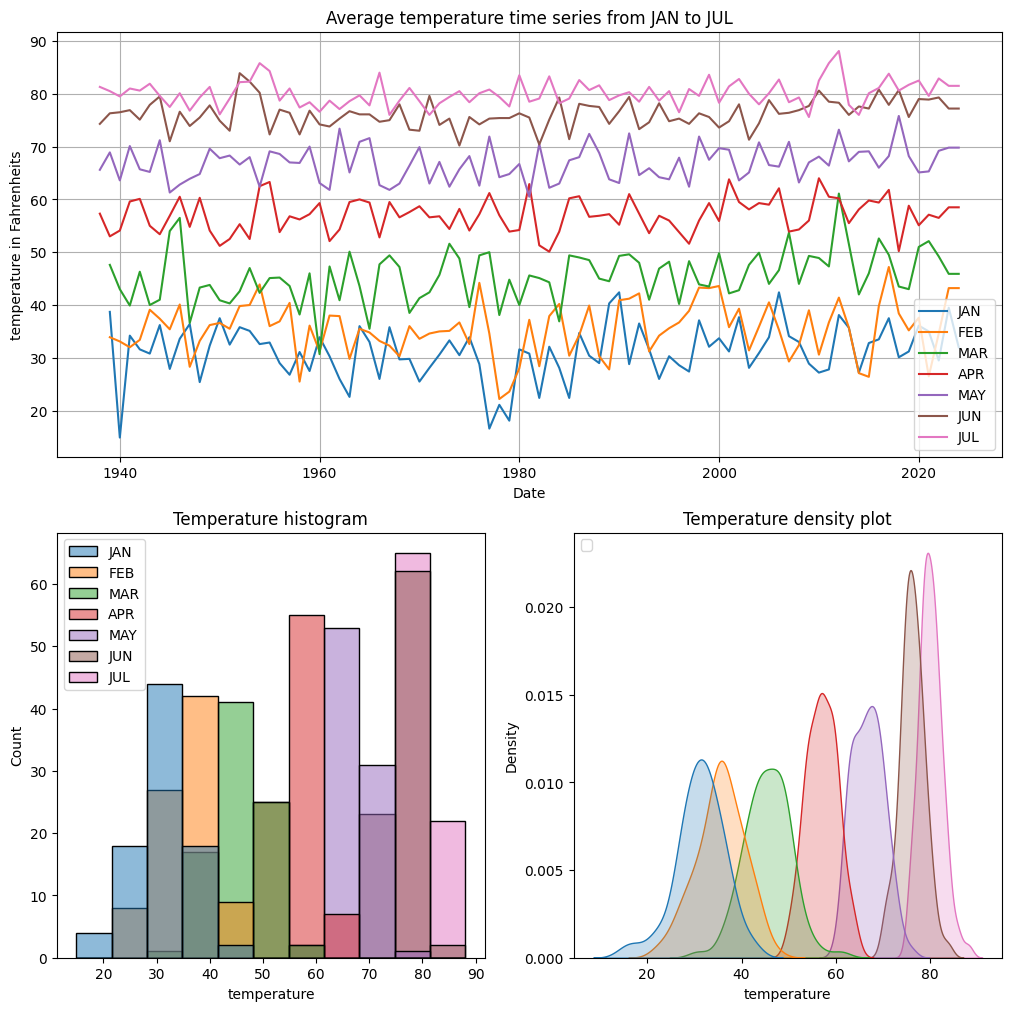

In [15]:
figure, axes = plt.subplot_mosaic([['time', 'time'], ['hist', 'kde']], layout='constrained', figsize=(10, 10))
avg_temp_df.plot(kind='line', ax=axes['time'], grid=True)
axes['time'].set(title=f'Average temperature time series from {months[month_from]} to {months[month_to - 1]}', ylabel='temperature in Fahrenheits')

sns.histplot(data=avg_temp_df, ax=axes['hist'], alpha=0.5)
axes['hist'].set(title='Temperature histogram', xlabel='temperature')

sns.kdeplot(data=avg_temp_df, ax=axes['kde'], fill=True, legend=False)
axes['kde'].legend(loc='upper left')
axes['kde'].set(title='Temperature density plot', xlabel='temperature')

* Generate descriptive statistics

In [13]:
avg_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 1938 to 2024
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JAN     86 non-null     float64
 1   FEB     86 non-null     float64
 2   MAR     86 non-null     float64
 3   APR     87 non-null     float64
 4   MAY     87 non-null     float64
 5   JUN     87 non-null     float64
 6   JUL     87 non-null     float64
dtypes: float64(7)
memory usage: 5.4 KB


In [14]:
avg_temp_df.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL
count,86.000000,86.000000,86.000000,87.000000,87.000000,87.000000,87.000000
mean,31.187209,35.487209,45.493605,57.013793,66.860920,76.190805,80.105747
std,5.178526,5.051029,4.867055,3.220544,3.294829,2.575449,2.397157
min,14.900000,22.200000,30.700000,50.100000,60.500000,70.200000,75.600000
25%,28.225000,32.450000,42.450000,54.300000,64.050000,74.650000,78.500000
50%,31.400000,35.650000,45.650000,56.900000,66.900000,76.200000,80.000000
75%,34.175000,39.075000,48.975000,59.450000,69.150000,77.850000,81.450000
max,42.400000,47.200000,61.100000,64.000000,75.800000,83.900000,88.100000
